In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import time
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
with open("..\\datasets\gtsrb-traffic-sign-detection-pickle\\train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("..\\datasets\gtsrb-traffic-sign-detection-pickle\\valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("..\\datasets\gtsrb-traffic-sign-detection-pickle\\test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [ ]:
X_train.shape
y_train.shape

(34799,)

Image Exploration

36

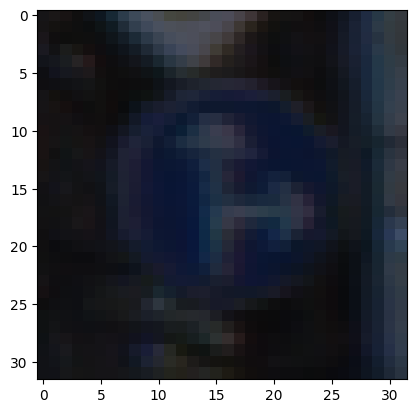

In [ ]:
i = 1001
plt.imshow(X_train[i])
y_train[i]

In [ ]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [ ]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


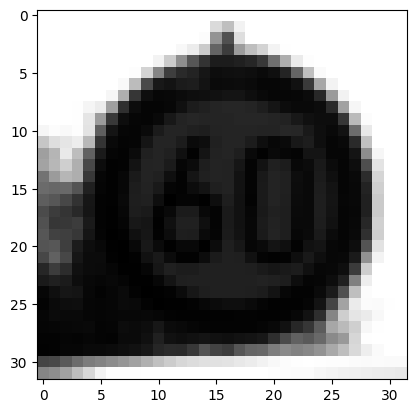

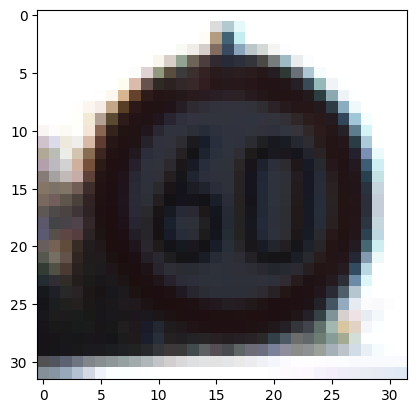

In [ ]:
X_train_gray.shape
i = 721
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

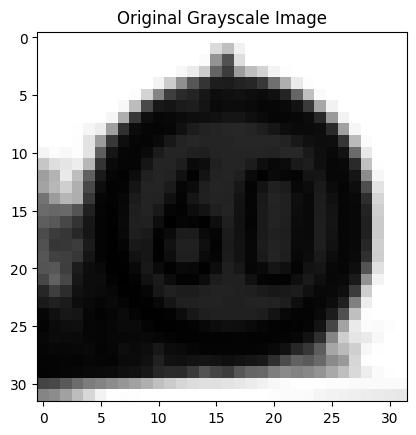

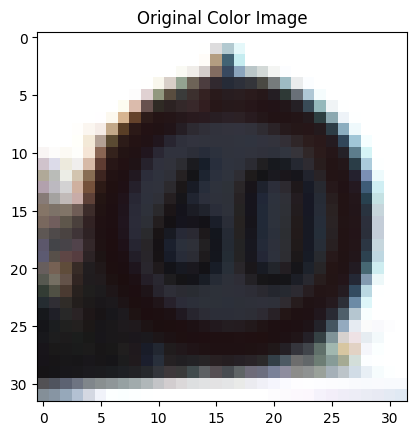

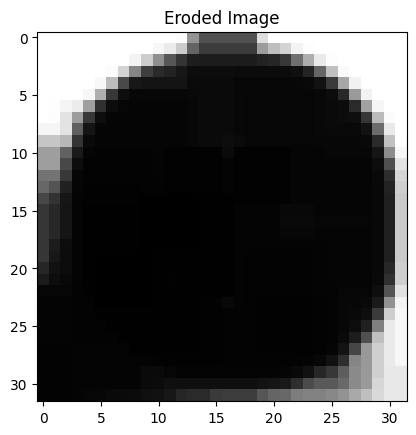

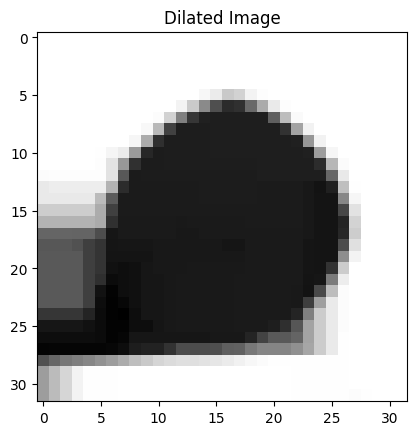

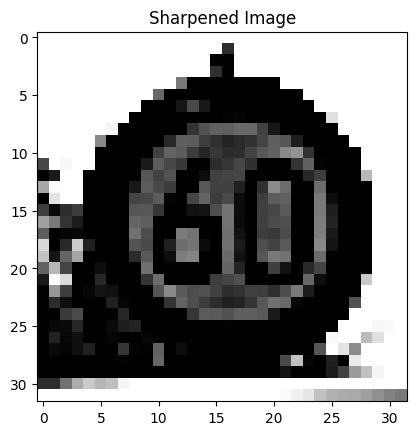

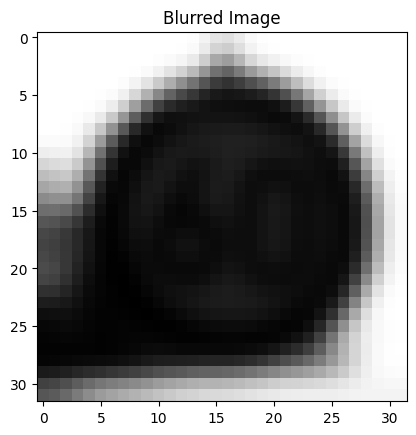

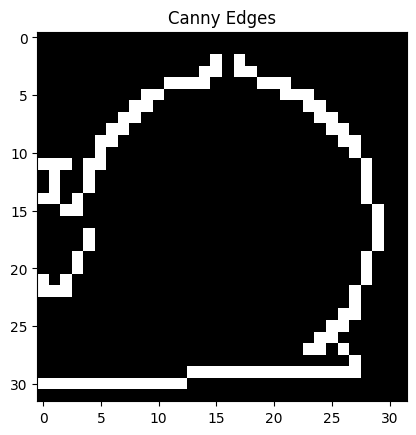

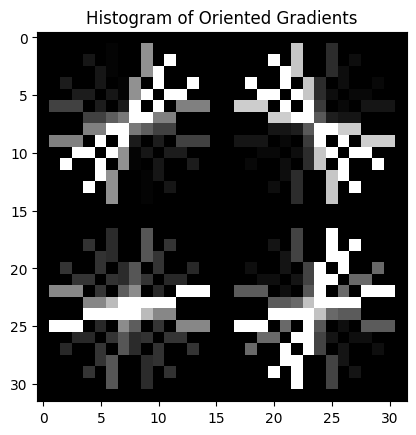

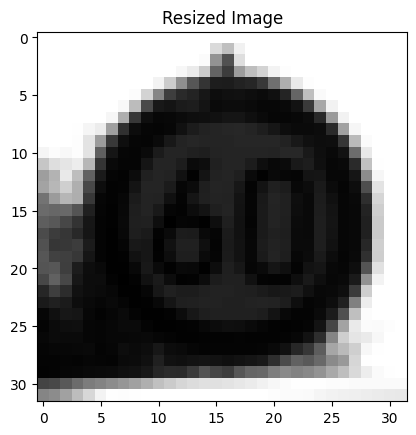

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Assuming X_train_gray and X_train are already defined and loaded

# Convert to uint8
i = 721
X_train_gray_uint8 = cv2.normalize(X_train_gray[i], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Display the original grayscale image
plt.imshow(X_train_gray_uint8.squeeze(), cmap='gray')
plt.title("Original Grayscale Image")
plt.figure()

# Display the corresponding color image
plt.imshow(X_train[i])
plt.title("Original Color Image")
plt.show()

# Image Erosion
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(X_train_gray_uint8, kernel, iterations=1)
plt.imshow(eroded.squeeze(), cmap='gray')
plt.title("Eroded Image")
plt.show()

# Image Dilation
dilated = cv2.dilate(X_train_gray_uint8, kernel, iterations=1)
plt.imshow(dilated.squeeze(), cmap='gray')
plt.title("Dilated Image")
plt.show()

# Image Sharpening
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened = cv2.filter2D(X_train_gray_uint8, -1, kernel_sharpening)
plt.imshow(sharpened.squeeze(), cmap='gray')
plt.title("Sharpened Image")
plt.show()

# Gaussian Blurring
blurred = cv2.GaussianBlur(X_train_gray_uint8, (5, 5), 0)
plt.imshow(blurred.squeeze(), cmap='gray')
plt.title("Blurred Image")
plt.show()

# Edge Detection using Canny
edges = cv2.Canny(X_train_gray_uint8, 100, 200)
plt.imshow(edges.squeeze(), cmap='gray')
plt.title("Canny Edges")
plt.show()

# Histogram of Oriented Gradients (HOG)
fd, hog_image = hog(X_train_gray_uint8, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=None)  # Corrected to 'None' for single channel
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.imshow(hog_image_rescaled, cmap='gray')
plt.title("Histogram of Oriented Gradients")
plt.show()

# Image Resizing (resizing is repeated here for complete script context)
resized_image = cv2.resize(X_train_gray_uint8, (32, 32))  # Resize to 32x32
plt.imshow(resized_image.squeeze(), cmap='gray')
plt.title("Resized Image")
plt.show()


Model 2

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.layers import MultiHeadAttention

def create_attentive_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Conv2D(filters=128, kernel_size=(3,3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)


    shape_before_flattening = x.shape[1:]
    x = Reshape(target_shape=(-1, shape_before_flattening[-1] * shape_before_flattening[1]))(x)

    # Apply MultiHeadAttention
    x = MultiHeadAttention(num_heads=5, key_dim=5, dropout=0.5)(x, x, x)

    x = GlobalAveragePooling1D()(x)

    x = Dense(256, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
model = create_attentive_cnn(X_train_gray_norm.shape[1:], 43)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
start_time = time.time()
history = model.fit(X_train_gray_norm, y_train, batch_size=70, epochs=100, validation_data=(X_validation_gray_norm, y_validation))
end_time = time.time()

duration = end_time - start_time
print(f"Training took: {duration} seconds")


Epoch 1/100
498/498 [==============================] - 8s 9ms/step - loss: 1.5446 - accuracy: 0.5496 - val_loss: 4.0809 - val_accuracy: 0.2091
Epoch 2/100
498/498 [==============================] - 5s 10ms/step - loss: 0.5999 - accuracy: 0.8163 - val_loss: 0.4264 - val_accuracy: 0.8923
Epoch 3/100
498/498 [==============================] - 4s 9ms/step - loss: 0.4365 - accuracy: 0.8679 - val_loss: 0.2933 - val_accuracy: 0.9061
Epoch 4/100
498/498 [==============================] - 4s 9ms/step - loss: 0.3752 - accuracy: 0.8860 - val_loss: 0.1981 - val_accuracy: 0.9463
Epoch 5/100
498/498 [==============================] - 5s 10ms/step - loss: 0.3179 - accuracy: 0.9068 - val_loss: 0.3284 - val_accuracy: 0.9243
Epoch 6/100
498/498 [==============================] - 5s 10ms/step - loss: 0.3081 - accuracy: 0.9066 - val_loss: 0.3092 - val_accuracy: 0.9150
Epoch 7/100
498/498 [==============================] - 5s 10ms/step - loss: 0.2864 - accuracy: 0.9161 - val_loss: 0.2509 - val_accuracy: 0.

In [ ]:
# Evaluate the model on the entire test set
score = model.evaluate(X_test_gray_norm, y_test, verbose=0)

# Optionally, warm up the model by making a few predictions
for _ in range(5):
    model.predict(X_test_gray_norm[0:1])

# Time a single prediction
start_time = time.time()
prediction = model.predict(X_test_gray_norm[0:1])
end_time = time.time()

# Calculate the prediction time
prediction_time = end_time - start_time

# Print out the evaluation metrics and the prediction time
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(f"Time taken for a single prediction: {prediction_time} seconds")

1/1 [==============================] - 0s 20ms/step
Test loss: 0.19241690635681152
Test accuracy: 0.9634204506874084
Time taken for a single prediction: 0.06669068336486816 seconds


In [ ]:
score = model.evaluate(X_test_gray_norm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21454140543937683
Test accuracy: 0.9629453420639038


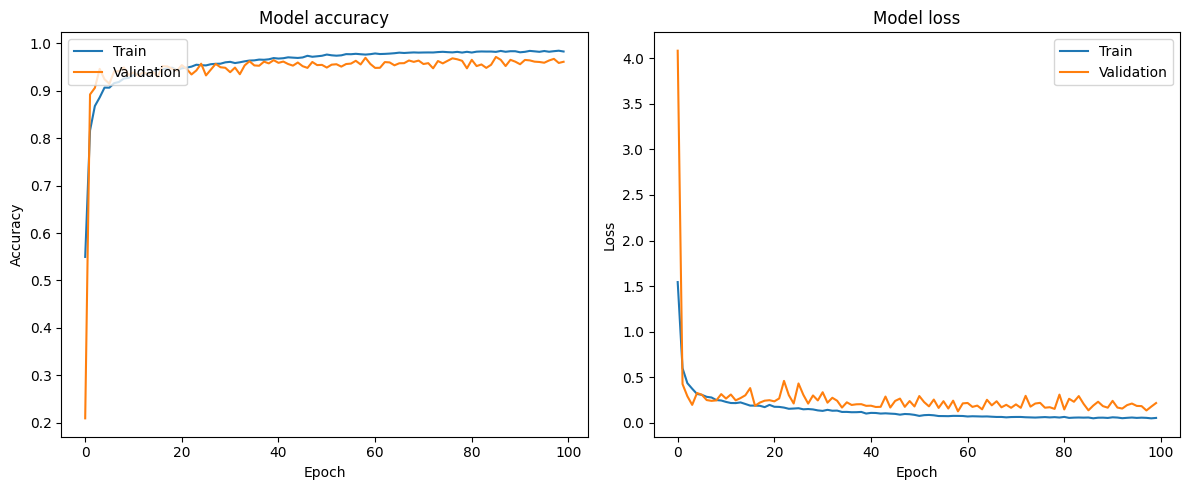

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Plotting confusion matrix


In [ ]:
import numpy as np

predictions = model.predict(X_test_gray_norm)
predicted_labels = np.argmax(predictions, axis=1)


395/395 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_labels)


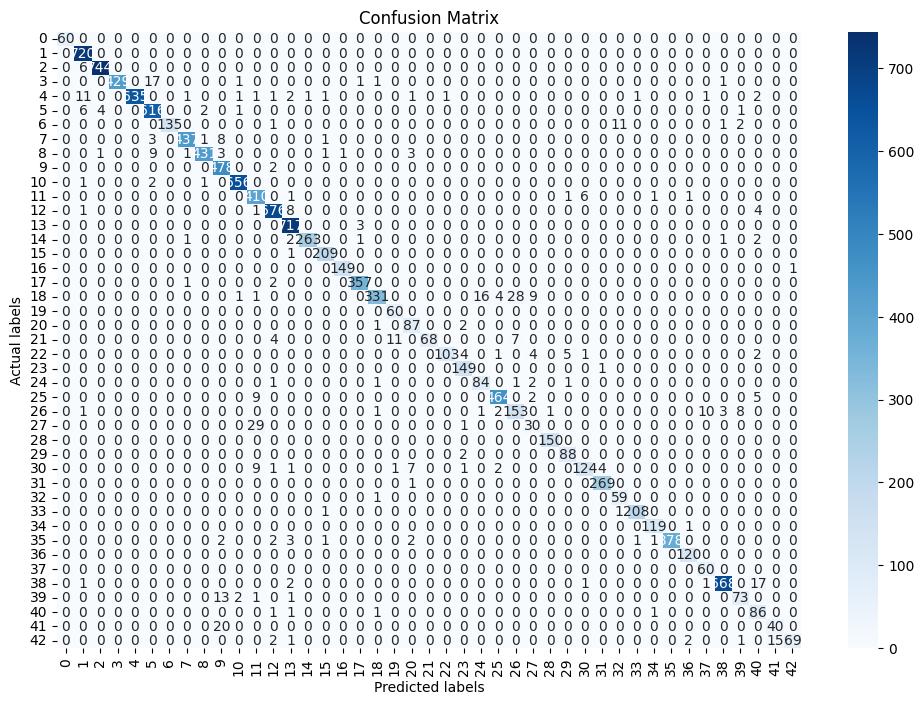

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=range(43), yticklabels=range(43))
plt.title('Confusion Matrix')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()
